
 # Air quality Dataset
1. Cleaning
2. Data integration
3. data transformation
4. data model building

In [114]:
import pandas as pd

In [115]:
import numpy as np
from sklearn.impute import SimpleImputer

In [116]:
df = pd.read_csv("India Air Quality Data.csv", low_memory=False, encoding="ISO-8859-1") 

In [117]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401092.000000,419505.000000,395516.000000,198355.000000,9314.000000
mean,10.829420,25.809681,108.833344,220.783480,40.791467
std,11.177242,18.503162,74.872597,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [118]:
# Data cleaning

In [119]:
df.isnull().sum()

stn_code                       144074
sampling_date                       0
state                               0
location                            0
agency                         149478
type                             5390
so2                             34643
no2                             16230
rspm                            40219
spm                            237380
location_monitoring_station     27488
pm2_5                          426421
date                                4
dtype: int64

In [120]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435730,SAMP,15-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,15-12-2015
435731,SAMP,18-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,18-12-2015
435732,SAMP,21-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,21-12-2015
435733,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,24-12-2015


In [121]:
df.drop(["spm", "pm2_5", "agency", "stn_code"], axis=1, inplace=True)
df

,sampling_date,state,location,type,so2,no2,rspm,location_monitoring_station,date
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,01-02-1990
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,01-02-1990
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,01-02-1990
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,01-03-1990
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,01-03-1990
...,...,...,...,...,...,...,...,...,...
435730,15-12-2015,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,"Inside Rampal Industries,ULUBERIA",15-12-2015
435731,18-12-2015,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,"Inside Rampal Industries,ULUBERIA",18-12-2015
435732,21-12-2015,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,"Inside Rampal Industries,ULUBERIA",21-12-2015
435733,24-12-2015,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,"Inside Rampal Industries,ULUBERIA",24-12-2015


In [122]:
df.drop(["sampling_date","location_monitoring_station"], axis=1, inplace=True)

In [123]:
df

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,01-02-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,01-02-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,01-02-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,01-03-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,01-03-1990
...,...,...,...,...,...,...,...
435730,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,15-12-2015
435731,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,18-12-2015
435732,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,21-12-2015
435733,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,24-12-2015


In [124]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[["so2", "no2", "rspm"]] = imputer.fit_transform(df[["so2", "no2", "rspm"]])

In [125]:
df

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.833344,01-02-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.833344,01-02-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.833344,01-02-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.833344,01-03-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.833344,01-03-1990
...,...,...,...,...,...,...,...
435730,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,15-12-2015
435731,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,18-12-2015
435732,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,21-12-2015
435733,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,24-12-2015


In [126]:
df.dropna(subset=['type', 'date'])

,state,location,type,so2,no2,rspm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.833344,01-02-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.833344,01-02-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.833344,01-02-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.833344,01-03-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.833344,01-03-1990
...,...,...,...,...,...,...,...
435730,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,15-12-2015
435731,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,18-12-2015
435732,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,21-12-2015
435733,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,24-12-2015


In [127]:
# Data integration
# Refers to aggregation of data from different sources into one place

In [128]:
# There are no various sources so integration is not possible

In [129]:
# Data transformation

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
label_encoder = LabelEncoder()

In [132]:
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = label_encoder.fit_transform(df[column].astype(str))
df

,state,location,type,so2,no2,rspm,date
0,0,114,6,4.8,17.4,108.833344,32
1,0,114,1,3.1,7.0,108.833344,32
2,0,114,6,6.2,28.5,108.833344,32
3,0,114,6,6.3,14.7,108.833344,60
4,0,114,1,4.7,7.5,108.833344,60
...,...,...,...,...,...,...,...
435730,33,282,3,20.0,44.0,148.000000,2639
435731,33,282,3,17.0,44.0,131.000000,3119
435732,33,282,3,18.0,45.0,140.000000,3585
435733,33,282,3,22.0,50.0,143.000000,4057


In [133]:
# Data model building

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train, x_test , y_train, y_test = train_test_split(df.drop(["rspm", "date"], axis=1), df["rspm"])

In [136]:
x_train

,state,location,type,so2,no2
316489,25,94,6,8.00,42.00
420975,33,104,2,9.40,45.60
379361,30,93,2,14.00,10.80
13835,0,114,6,4.50,12.10
46019,3,76,6,27.90,35.10
...,...,...,...,...,...
27035,2,100,5,16.00,28.30
5904,0,295,5,6.80,25.80
1098,0,114,1,4.80,21.40
91998,10,2,5,15.20,18.40


In [137]:
x_test

,state,location,type,so2,no2
268039,22,81,6,2.00000,9.000000
123002,12,287,1,2.00000,5.000000
235462,18,197,6,21.00000,38.000000
293958,25,165,1,21.00000,32.000000
334519,26,119,6,5.00000,31.000000
...,...,...,...,...,...
268212,22,81,6,2.00000,7.000000
409701,30,6,6,1.00000,12.000000
365526,29,211,6,5.00000,20.000000
78738,9,294,1,12.00000,10.000000


In [151]:
from sklearn.linear_model import LogisticRegression

In [155]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [156]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [157]:
y_pred = model.predict(x_test)

In [158]:
pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

<Axes: xlabel='rspm'>

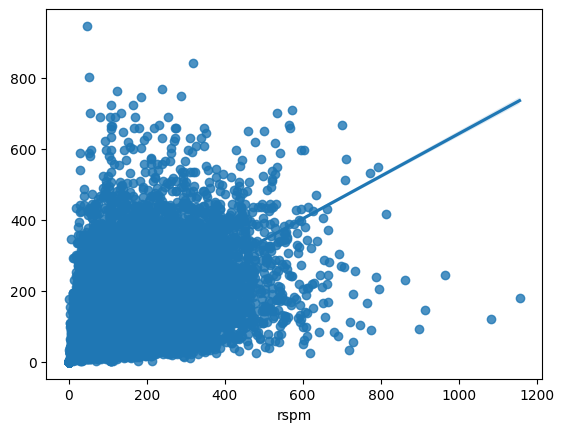

In [164]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred)

In [163]:
from sklearn.metrics import mean_squared_error, f1_score

mean_squared_error(y_test, y_pred)

3355.0065901441444